In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import seaborn as sns
import plotly.express as pe
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 500
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/PrathameshR10/Assignments/main/Folder/heart_disease%20a13.csv')

In [3]:
df

age   sex               cp  trestbps  chol    fbs           restecg  \
0     63  Male   typical angina       145   233   True    lv hypertrophy   
1     41  Male  atypical angina       135   203  False            normal   
2     57  Male     asymptomatic       140   192  False            normal   
3     52  Male   typical angina       118   186  False    lv hypertrophy   
4     57  Male     asymptomatic       110   201  False            normal   
..   ...   ...              ...       ...   ...    ...               ...   
903   53  Male     asymptomatic       125     0  False            normal   
904   62  Male     asymptomatic       166   170  False  st-t abnormality   
905   56  Male      non-anginal       170     0  False    lv hypertrophy   
906   56  Male      non-anginal       144   208   True  st-t abnormality   
907   57  Male     asymptomatic       142   277   True  st-t abnormality   

     thalch  exang  oldpeak        slope               thal  num  
0       150  FALSE      2.3  downsloping       fixed defect    0  
1       132  FALSE      0.0         flat       fixed defect    0  
2       148  FALSE      0.4         flat       fixed defect    0  
3       190  FALSE      0.0         flat       fixed defect    0  
4       126   TRUE      1.5         flat       fixed defect    0  
..      ...    ...      ...          ...                ...  ...  
903     120  FALSE      1.5    upsloping       fixed defect    4  
904     120   TRUE      3.0         flat             normal    4  
905     123   TRUE      2.5  downsloping             normal    4  
906     105   TURE      NaN  downsloping  reversable defect    4  
907     182  FALSE      NaN         flat             normal    4  

[908 rows x 13 columns]

In [4]:
# age: Age of the patient.
# sex: Sex of the patient.
# cp: Chest pain type (4 values)
# trestbps: Resting blood pressure (in mm Hg on admission to the hospital).
# chol: Serum cholesterol in mg/dl.
# fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).
# restecg: Resting electrocardiographic results :
# thalch: Maximum heart rate achieved.
# exang: Exercise-induced angina (1 = yes; 0 = no).
# oldpeak: ST depression induced by exercise relative to rest.
# slope: The slope of the peak exercise ST segment.
# thal: Thalassemia.
# num: Diagnosis of heart disease (angiographic disease status)

In [5]:
df.describe()

age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


### Missing Values

In [7]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [8]:
pe.box(df['oldpeak'])

In [9]:
df['oldpeak'].unique()

array([ 2.3,  0. ,  0.4,  1.5,  1. ,  nan,  2.6,  0.5,  1.2,  3.5,  1.4,
        1.1,  0.6,  2. ,  1.6,  0.1,  0.3,  1.3,  0.2,  2.4,  1.8,  3. ,
        0.8,  1.9,  0.9,  0.7,  4.2, -0.5, -0.1, -1.1,  2.1,  3.6,  1.7,
        3.1,  2.2,  2.5,  2.8, -1.5, -0.9, -2.6, -0.8,  4. ,  5. , -1. ,
        3.4, -2. , -0.7,  3.2,  6.2,  5.6,  2.9,  3.7,  4.4,  3.8])

In [10]:
df.fillna(df['oldpeak'].median(),inplace=True)

In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

### Data Inconsistencies

In [12]:
df['exang'].value_counts()

FALSE    535
TRUE     337
TURE      36
Name: exang, dtype: int64

In [13]:
df['exang'] = df['exang'].replace('TURE','TRUE')

In [14]:
df['exang'].unique()

array(['FALSE', 'TRUE'], dtype=object)

### Outliers

<Axes: >

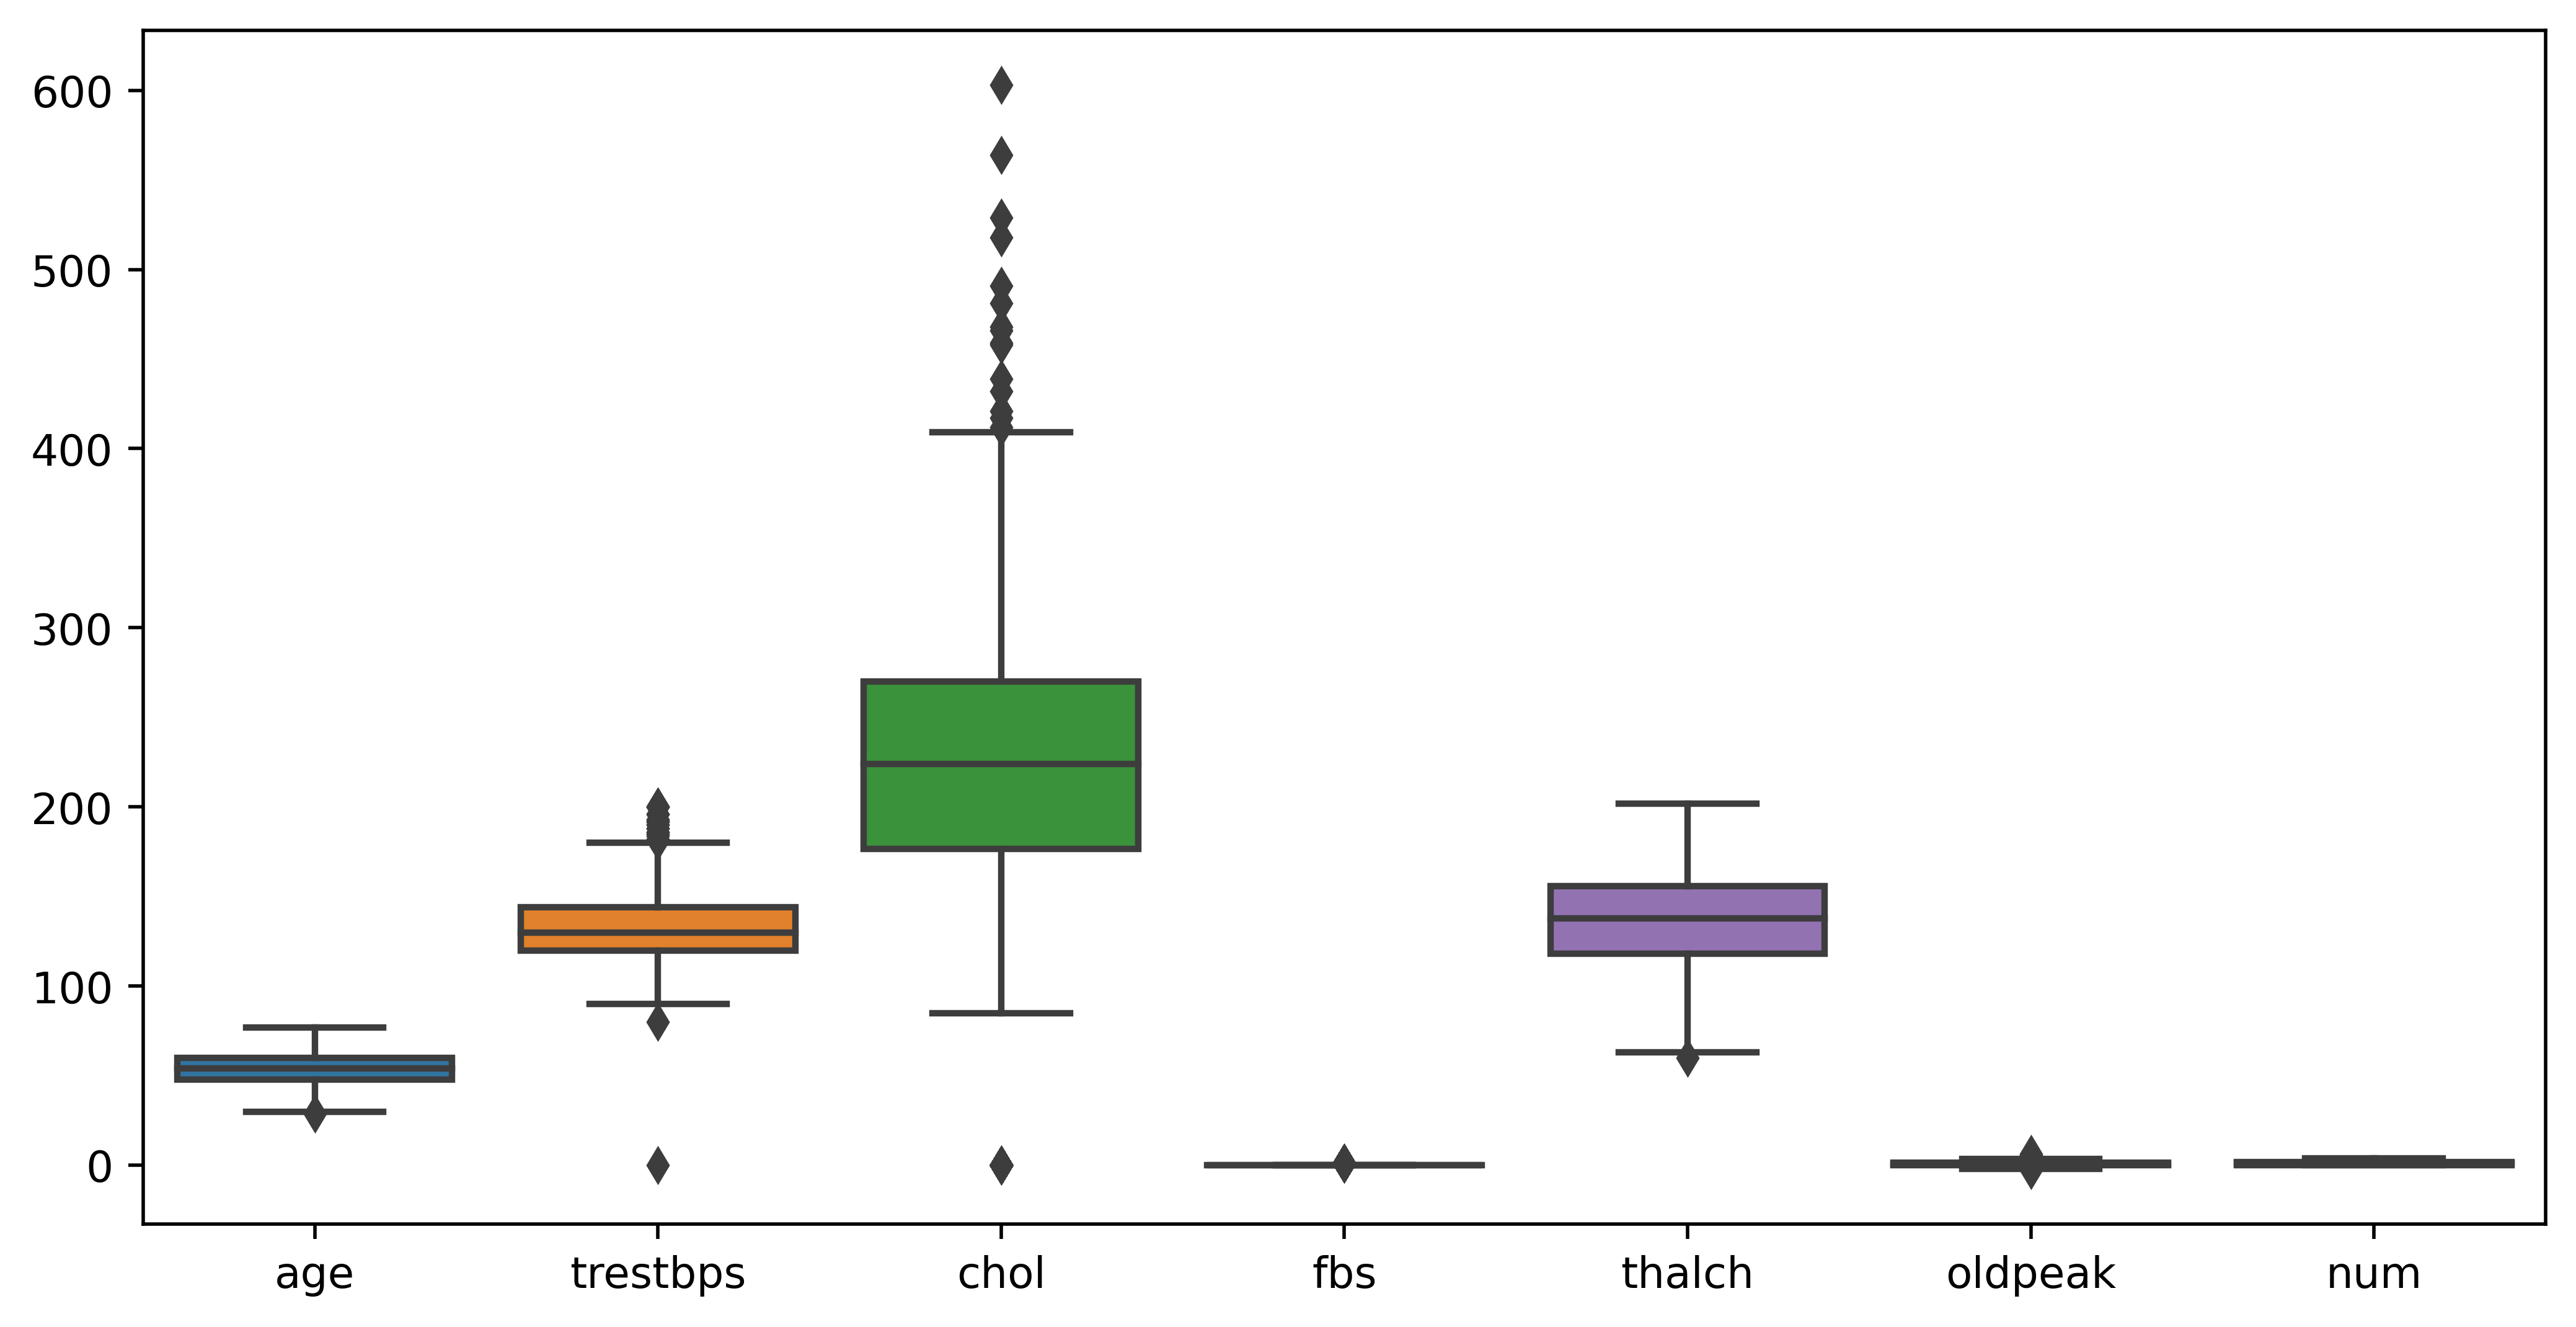

In [15]:
sns.boxplot(df)

In [16]:
def outlier_capping(data, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 -Q1
    
    lower_cap = Q1 - 1.5 * IQR
    upper_cap = Q3 + 1.5 * IQR
    
    df[columns] = df[columns].clip(lower=lower_cap, upper=upper_cap, axis = 1)
    return df

cap_columns = [ 'trestbps', 'chol', 'oldpeak']
cap_df = outlier_capping(df, cap_columns)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    float64
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(2), int64(4), object(6)
memory usage: 86.1+ KB


In [18]:
df['num'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

### Data Visualization

<Axes: xlabel='num', ylabel='count'>

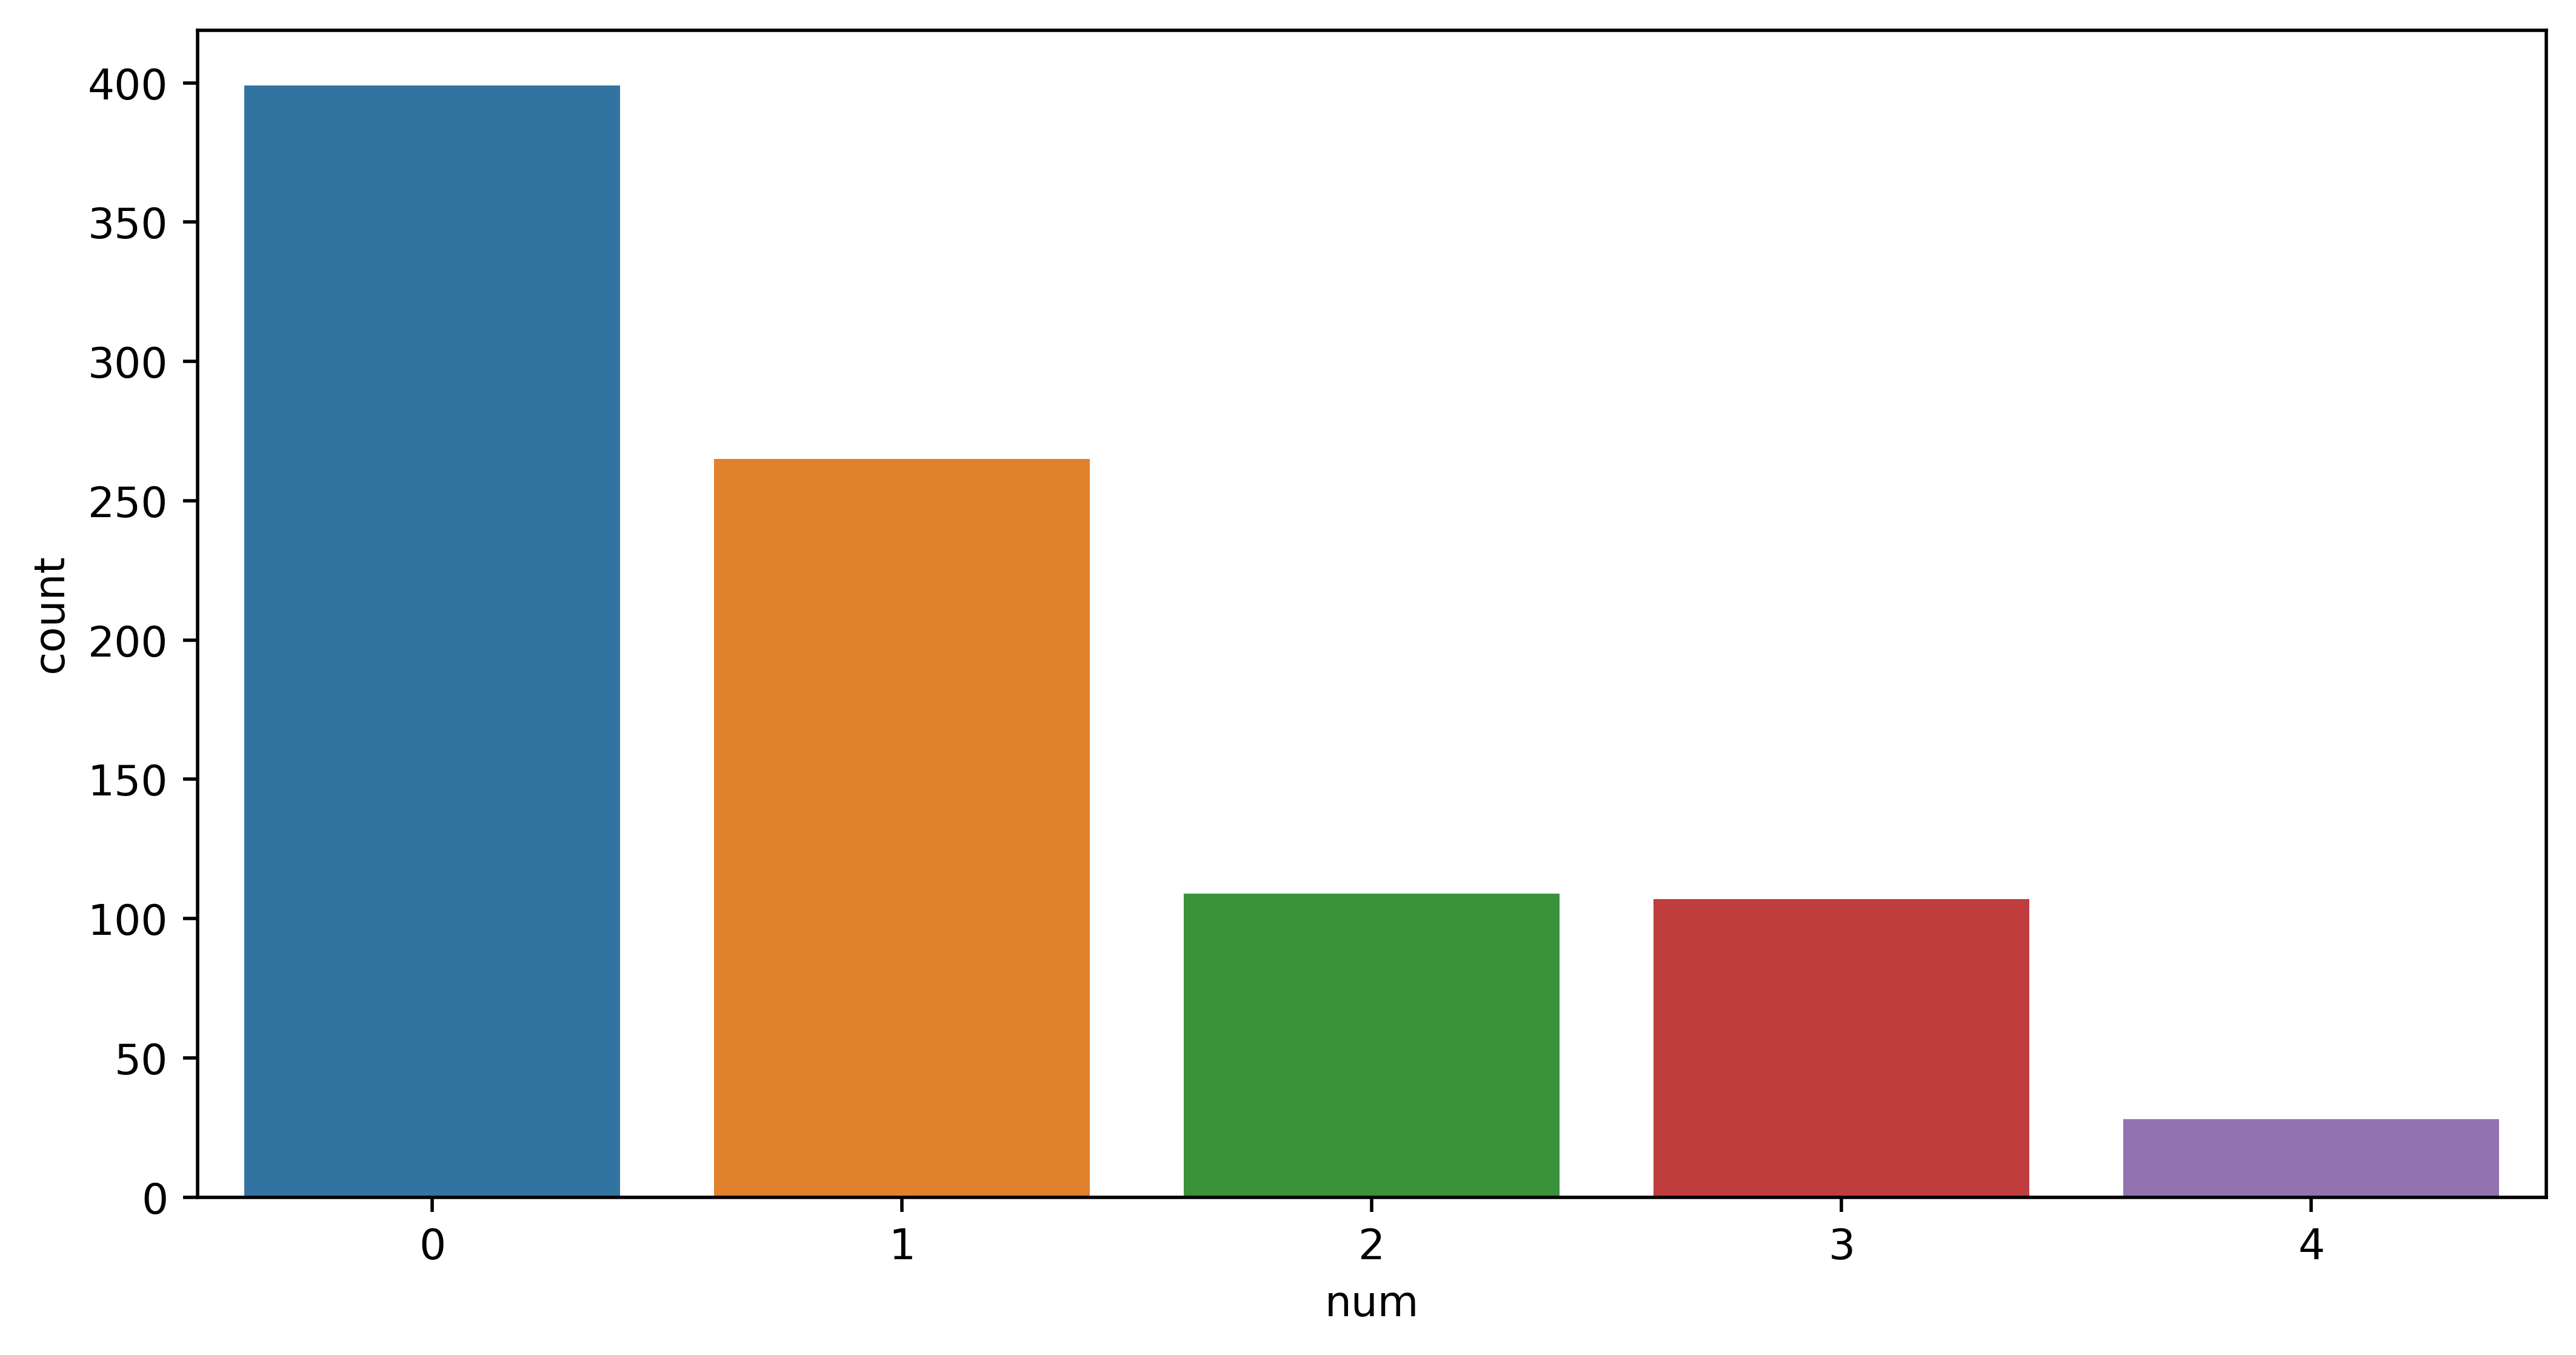

In [19]:
sns.countplot(x = df['num'])

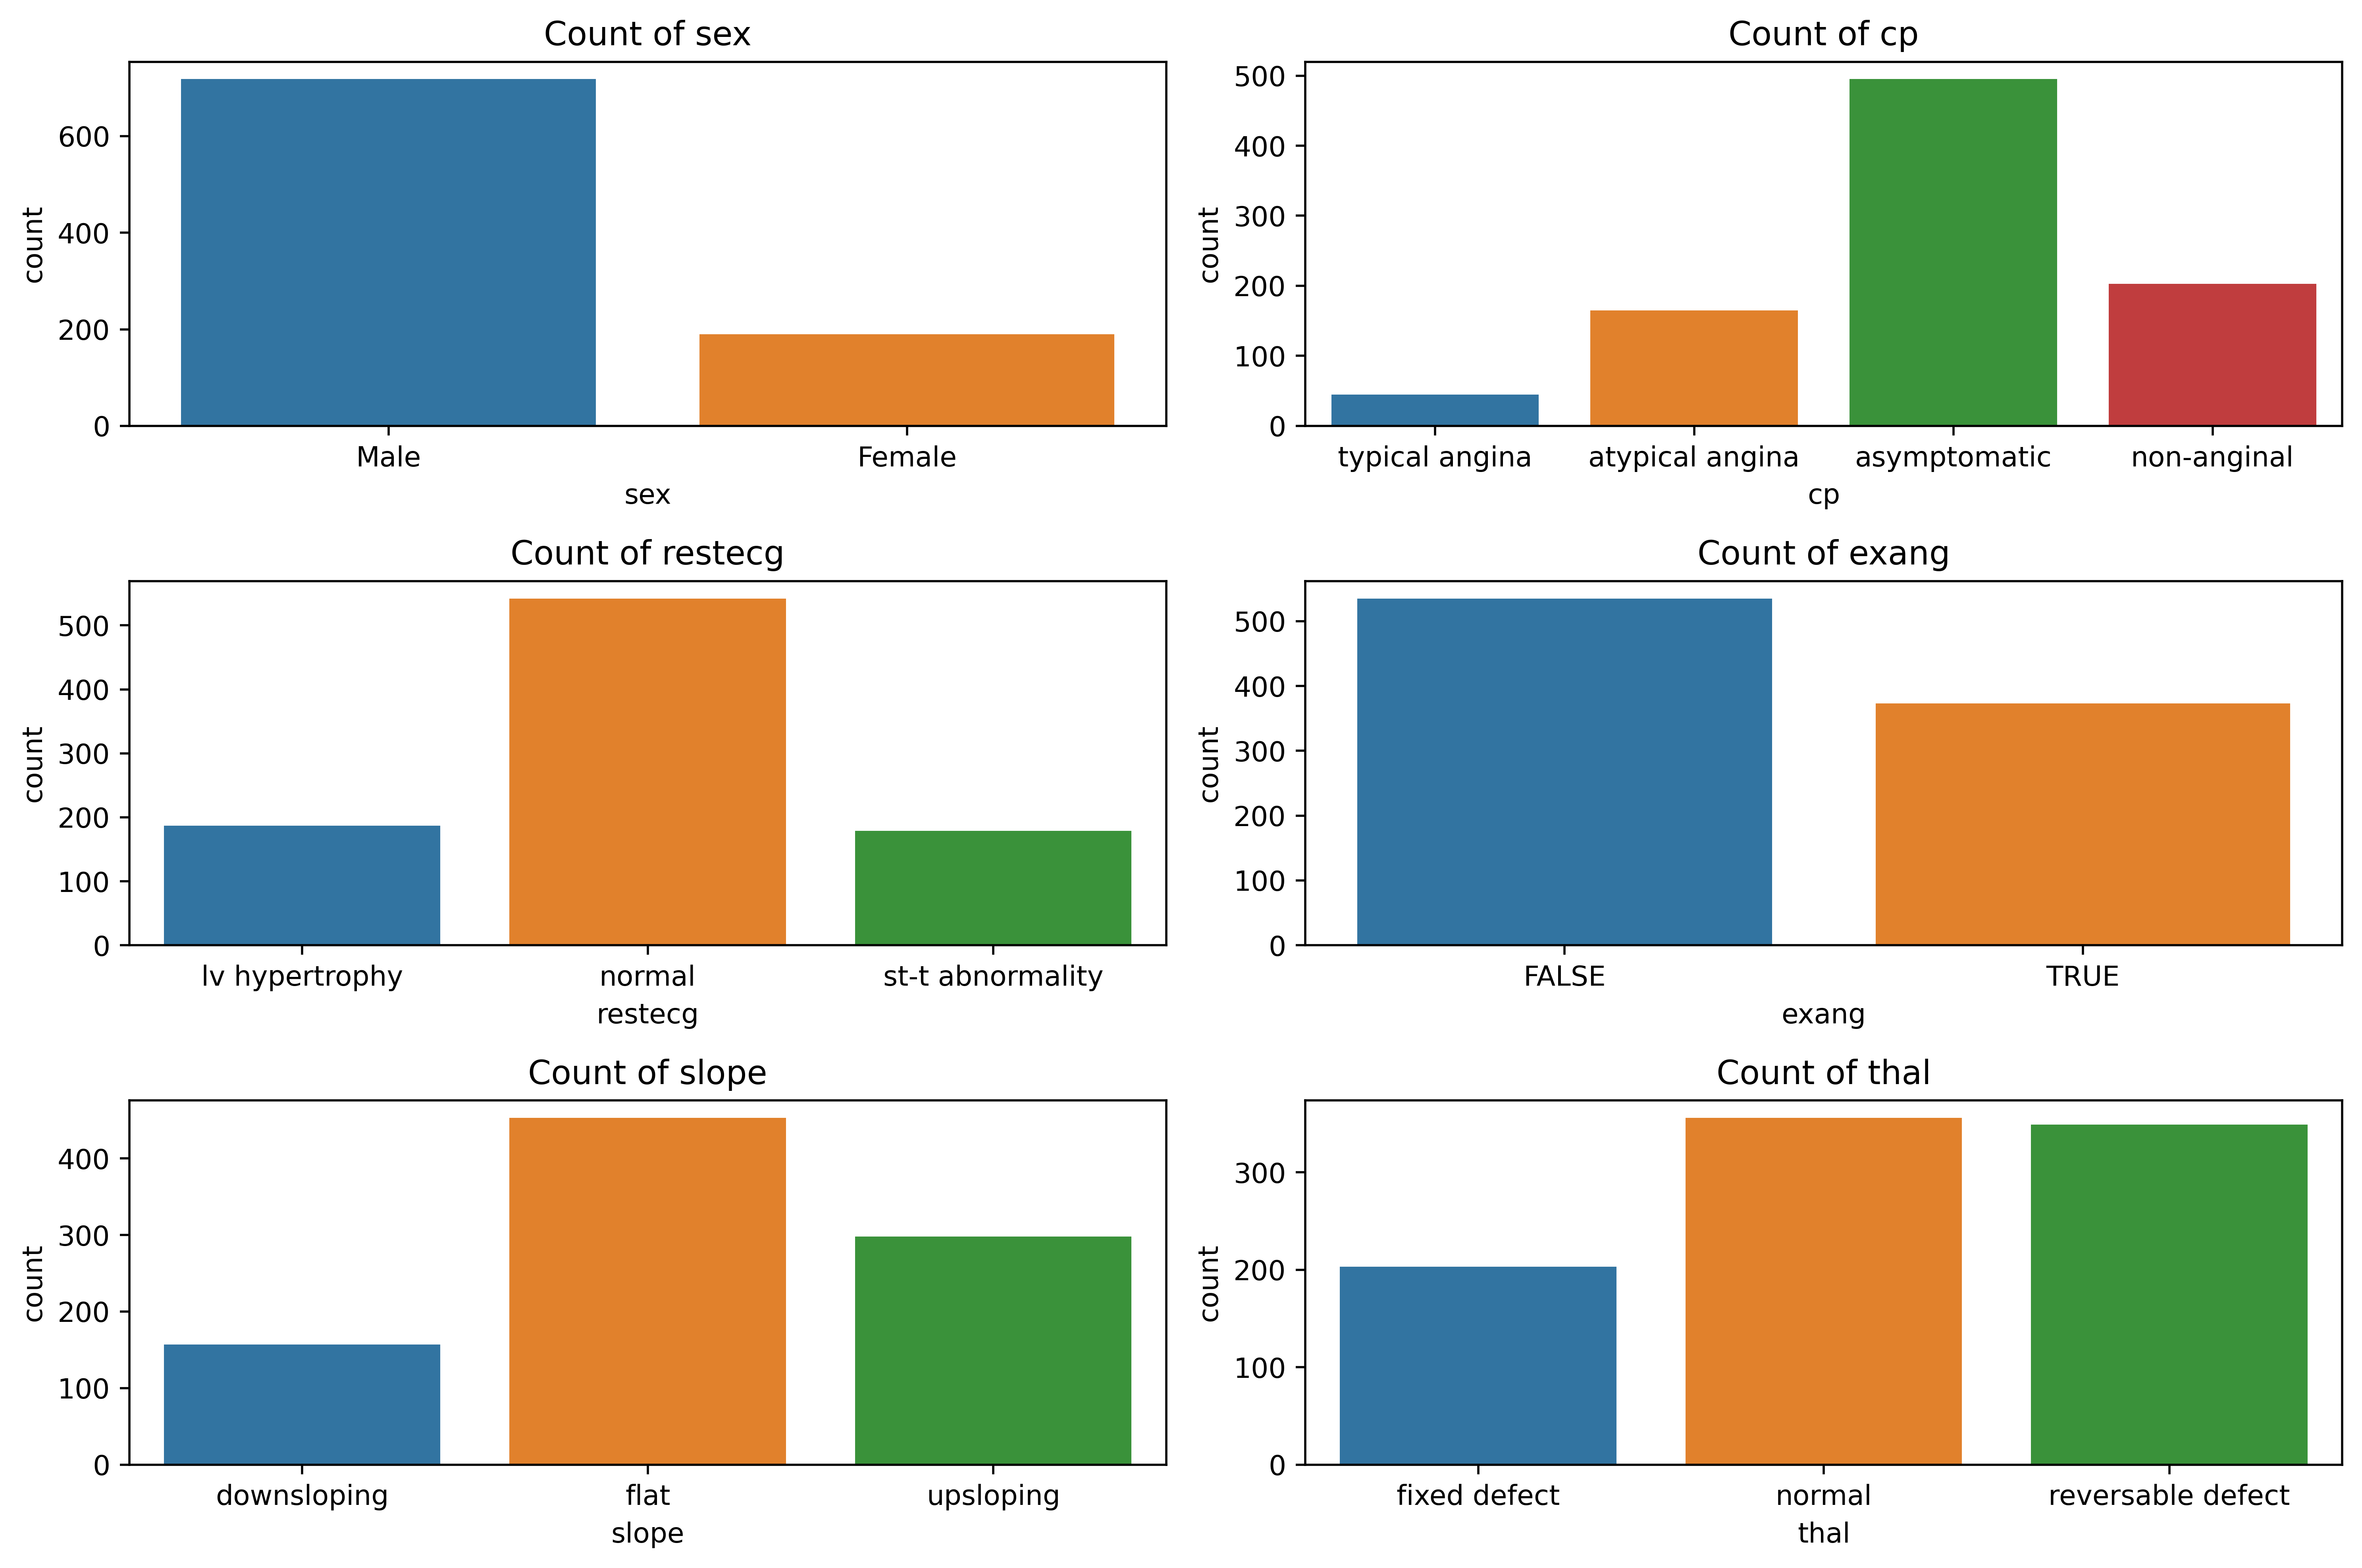

In [20]:
categorical_features = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']

plt.figure(figsize=(12, 8))

for i, feature in enumerate(categorical_features):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=df[feature])
    plt.title(f'Count of {feature}')

plt.tight_layout()

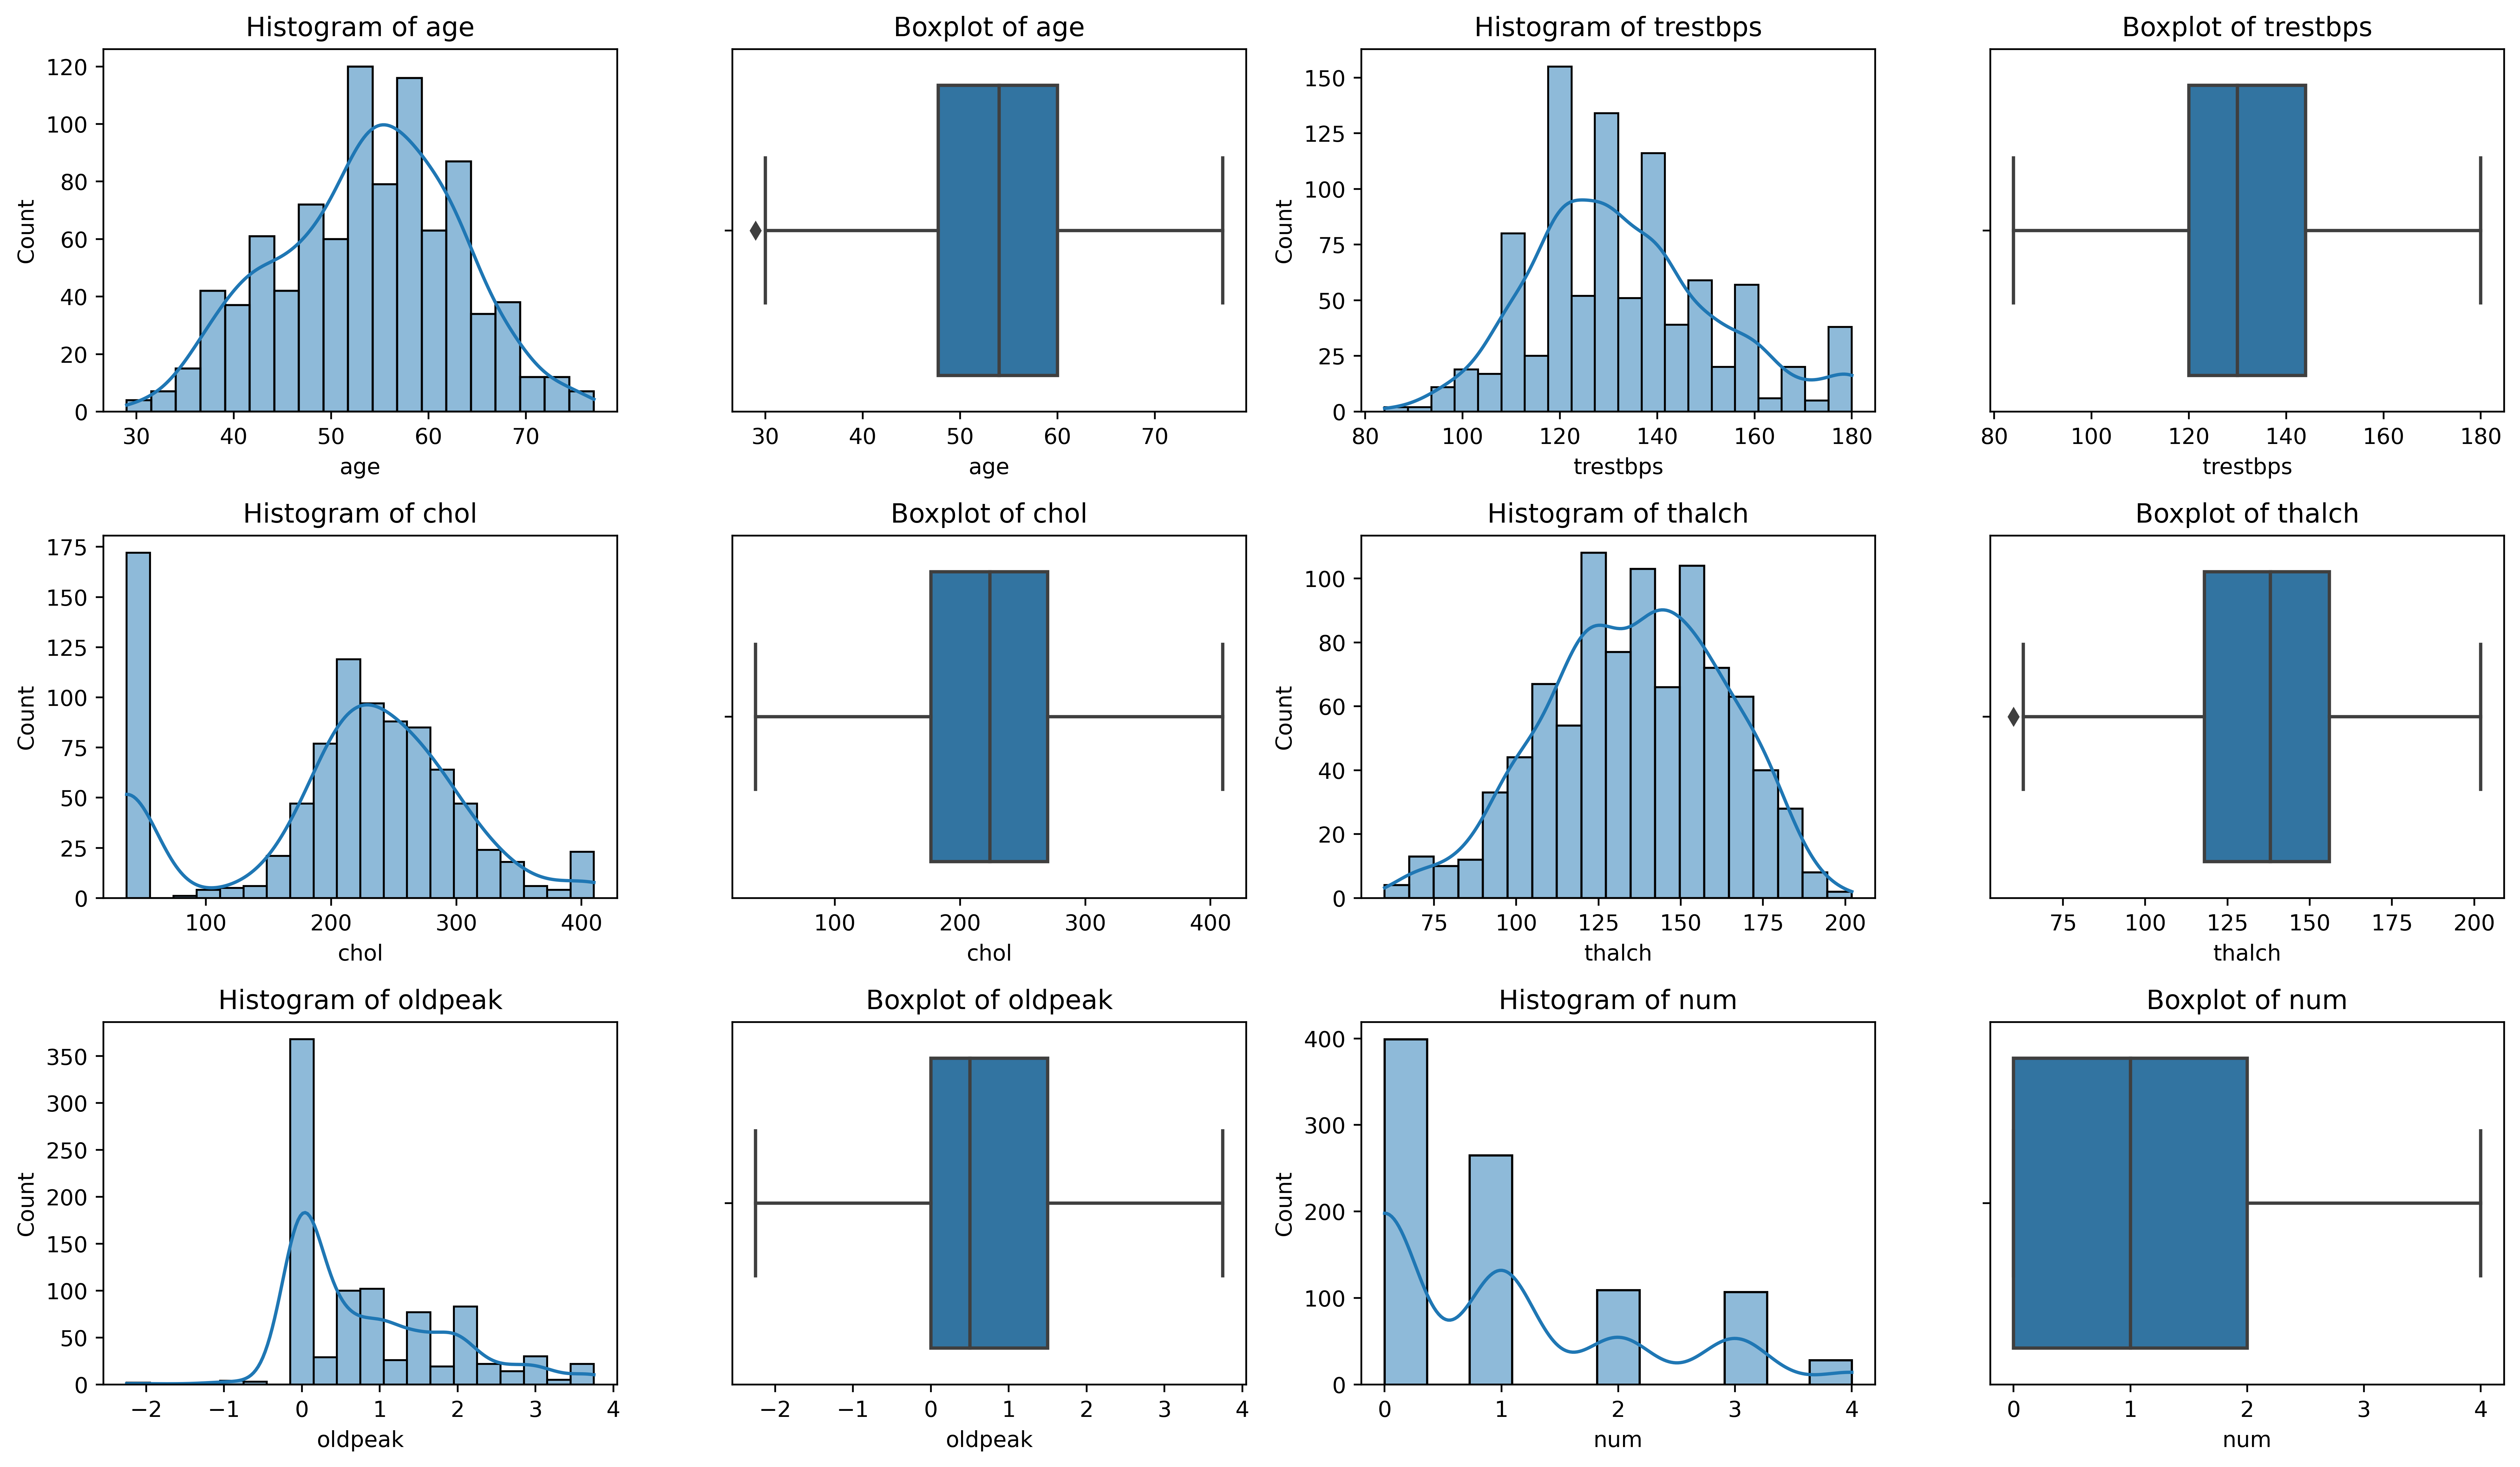

In [21]:
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak','num']
plt.figure(figsize=(16, 12))

for i, feature in enumerate(numerical_features):
    plt.subplot(4, 4, 2*i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')

    plt.subplot(4, 4, 2*i+2)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

In [22]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [23]:
df['num_binary'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

In [24]:
df.drop(columns='num',inplace=True)

In [25]:
df

age   sex               cp  trestbps     chol    fbs           restecg  \
0     63  Male   typical angina       145  233.000   True    lv hypertrophy   
1     41  Male  atypical angina       135  203.000  False            normal   
2     57  Male     asymptomatic       140  192.000  False            normal   
3     52  Male   typical angina       118  186.000  False    lv hypertrophy   
4     57  Male     asymptomatic       110  201.000  False            normal   
..   ...   ...              ...       ...      ...    ...               ...   
903   53  Male     asymptomatic       125   36.875  False            normal   
904   62  Male     asymptomatic       166  170.000  False  st-t abnormality   
905   56  Male      non-anginal       170   36.875  False    lv hypertrophy   
906   56  Male      non-anginal       144  208.000   True  st-t abnormality   
907   57  Male     asymptomatic       142  277.000   True  st-t abnormality   

     thalch  exang  oldpeak        slope               thal  num_binary  
0       150  FALSE      2.3  downsloping       fixed defect           0  
1       132  FALSE      0.0         flat       fixed defect           0  
2       148  FALSE      0.4         flat       fixed defect           0  
3       190  FALSE      0.0         flat       fixed defect           0  
4       126   TRUE      1.5         flat       fixed defect           0  
..      ...    ...      ...          ...                ...         ...  
903     120  FALSE      1.5    upsloping       fixed defect           1  
904     120   TRUE      3.0         flat             normal           1  
905     123   TRUE      2.5  downsloping             normal           1  
906     105   TRUE      0.5  downsloping  reversable defect           1  
907     182  FALSE      0.5         flat             normal           1  

[908 rows x 13 columns]

### Encoding Categorical Variables

In [26]:
dfs = pd.get_dummies(df,columns=['sex', 'cp', 'restecg', 'exang', 'slope', 'thal','fbs','num_binary'],drop_first=True)

In [27]:
dfs

age  trestbps     chol  thalch  oldpeak  sex_Male  cp_atypical angina  \
0     63       145  233.000     150      2.3         1                   0   
1     41       135  203.000     132      0.0         1                   1   
2     57       140  192.000     148      0.4         1                   0   
3     52       118  186.000     190      0.0         1                   0   
4     57       110  201.000     126      1.5         1                   0   
..   ...       ...      ...     ...      ...       ...                 ...   
903   53       125   36.875     120      1.5         1                   0   
904   62       166  170.000     120      3.0         1                   0   
905   56       170   36.875     123      2.5         1                   0   
906   56       144  208.000     105      0.5         1                   0   
907   57       142  277.000     182      0.5         1                   0   

     cp_non-anginal  cp_typical angina  restecg_normal  \
0                 0                  1               0   
1                 0                  0               1   
2                 0                  0               1   
3                 0                  1               0   
4                 0                  0               1   
..              ...                ...             ...   
903               0                  0               1   
904               0                  0               0   
905               1                  0               0   
906               1                  0               0   
907               0                  0               0   

     restecg_st-t abnormality  exang_TRUE  slope_flat  slope_upsloping  \
0                           0           0           0                0   
1                           0           0           1                0   
2                           0           0           1                0   
3                           0           0           1                0   
4                           0           1           1                0   
..                        ...         ...         ...              ...   
903                         0           0           0                1   
904                         1           1           1                0   
905                         0           1           0                0   
906                         1           1           0                0   
907                         1           0           1                0   

     thal_normal  thal_reversable defect  fbs_True  num_binary_1  
0              0                       0         1             0  
1              0                       0         0             0  
2              0                       0         0             0  
3              0                       0         0             0  
4              0                       0         0             0  
..           ...                     ...       ...           ...  
903            0                       0         0             1  
904            1                       0         0             1  
905            1                       0         0             1  
906            0                       1         1             1  
907            1                       0         1             1  

[908 rows x 18 columns]

In [28]:
x1 = dfs.drop(columns='num_binary_1')
y = dfs['num_binary_1']

In [29]:
x1

age  trestbps     chol  thalch  oldpeak  sex_Male  cp_atypical angina  \
0     63       145  233.000     150      2.3         1                   0   
1     41       135  203.000     132      0.0         1                   1   
2     57       140  192.000     148      0.4         1                   0   
3     52       118  186.000     190      0.0         1                   0   
4     57       110  201.000     126      1.5         1                   0   
..   ...       ...      ...     ...      ...       ...                 ...   
903   53       125   36.875     120      1.5         1                   0   
904   62       166  170.000     120      3.0         1                   0   
905   56       170   36.875     123      2.5         1                   0   
906   56       144  208.000     105      0.5         1                   0   
907   57       142  277.000     182      0.5         1                   0   

     cp_non-anginal  cp_typical angina  restecg_normal  \
0                 0                  1               0   
1                 0                  0               1   
2                 0                  0               1   
3                 0                  1               0   
4                 0                  0               1   
..              ...                ...             ...   
903               0                  0               1   
904               0                  0               0   
905               1                  0               0   
906               1                  0               0   
907               0                  0               0   

     restecg_st-t abnormality  exang_TRUE  slope_flat  slope_upsloping  \
0                           0           0           0                0   
1                           0           0           1                0   
2                           0           0           1                0   
3                           0           0           1                0   
4                           0           1           1                0   
..                        ...         ...         ...              ...   
903                         0           0           0                1   
904                         1           1           1                0   
905                         0           1           0                0   
906                         1           1           0                0   
907                         1           0           1                0   

     thal_normal  thal_reversable defect  fbs_True  
0              0                       0         1  
1              0                       0         0  
2              0                       0         0  
3              0                       0         0  
4              0                       0         0  
..           ...                     ...       ...  
903            0                       0         0  
904            1                       0         0  
905            1                       0         0  
906            0                       1         1  
907            1                       0         1  

[908 rows x 17 columns]

### Standardization

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
sc = StandardScaler()

In [32]:
data = sc.fit_transform(x1)

In [33]:
x = pd.DataFrame(data,columns=x1.columns)
x

age  trestbps      chol    thalch   oldpeak  sex_Male  \
0    1.006027  0.607417  0.264845  0.524183  1.411045  0.514416   
1   -1.397560  0.089009 -0.045006 -0.147705 -0.834669  0.514416   
2    0.350503  0.348213 -0.158618  0.449529 -0.444110  0.514416   
3   -0.195767 -0.792285 -0.220589  2.017268 -0.834669  0.514416   
4    0.350503 -1.207012 -0.065663 -0.371668  0.629927  0.514416   
..        ...       ...       ...       ...       ...       ...   
903 -0.086513 -0.429400 -1.760808 -0.595631  0.629927  0.514416   
904  0.896773  1.696074 -0.385843 -0.595631  2.094523  0.514416   
905  0.241249  1.903437 -1.760808 -0.483649  1.606325  0.514416   
906  0.241249  0.555576  0.006636 -1.155538 -0.346471  0.514416   
907  0.350503  0.451894  0.719294  1.718651 -0.346471  0.514416   

     cp_atypical angina  cp_non-anginal  cp_typical angina  restecg_normal  \
0             -0.471246       -0.536603           4.379244       -1.216912   
1              2.122034       -0.536603          -0.228350        0.821752   
2             -0.471246       -0.536603          -0.228350        0.821752   
3             -0.471246       -0.536603           4.379244       -1.216912   
4             -0.471246       -0.536603          -0.228350        0.821752   
..                  ...             ...                ...             ...   
903           -0.471246       -0.536603          -0.228350        0.821752   
904           -0.471246       -0.536603          -0.228350       -1.216912   
905           -0.471246        1.863574          -0.228350       -1.216912   
906           -0.471246        1.863574          -0.228350       -1.216912   
907           -0.471246       -0.536603          -0.228350       -1.216912   

     restecg_st-t abnormality  exang_TRUE  slope_flat  slope_upsloping  \
0                   -0.495522   -0.834983   -0.997800        -0.698945   
1                   -0.495522   -0.834983    1.002205        -0.698945   
2                   -0.495522   -0.834983    1.002205        -0.698945   
3                   -0.495522   -0.834983    1.002205        -0.698945   
4                   -0.495522    1.197629    1.002205        -0.698945   
..                        ...         ...         ...              ...   
903                 -0.495522   -0.834983   -0.997800         1.430727   
904                  2.018075    1.197629    1.002205        -0.698945   
905                 -0.495522    1.197629   -0.997800        -0.698945   
906                  2.018075    1.197629   -0.997800        -0.698945   
907                  2.018075   -0.834983    1.002205        -0.698945   

     thal_normal  thal_reversable defect  fbs_True  
0      -0.803074               -0.790145  1.976894  
1      -0.803074               -0.790145 -0.505844  
2      -0.803074               -0.790145 -0.505844  
3      -0.803074               -0.790145 -0.505844  
4      -0.803074               -0.790145 -0.505844  
..           ...                     ...       ...  
903    -0.803074               -0.790145 -0.505844  
904     1.245216               -0.790145 -0.505844  
905     1.245216               -0.790145 -0.505844  
906    -0.803074                1.265590  1.976894  
907     1.245216               -0.790145  1.976894  

[908 rows x 17 columns]

### Model Building

In [34]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [35]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=42)

In [36]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [37]:
ypred = dt.predict(xtest)
ypred

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0], dtype=uint8)

### Evaluation Metrics

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75        89
           1       0.76      0.73      0.75        93

    accuracy                           0.75       182
   macro avg       0.75      0.75      0.75       182
weighted avg       0.75      0.75      0.75       182



In [40]:
print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', dt.score(xtest,ytest))

Training accuracy:  0.9490358126721763
Testing Accuracy:  0.7472527472527473


<Axes: >

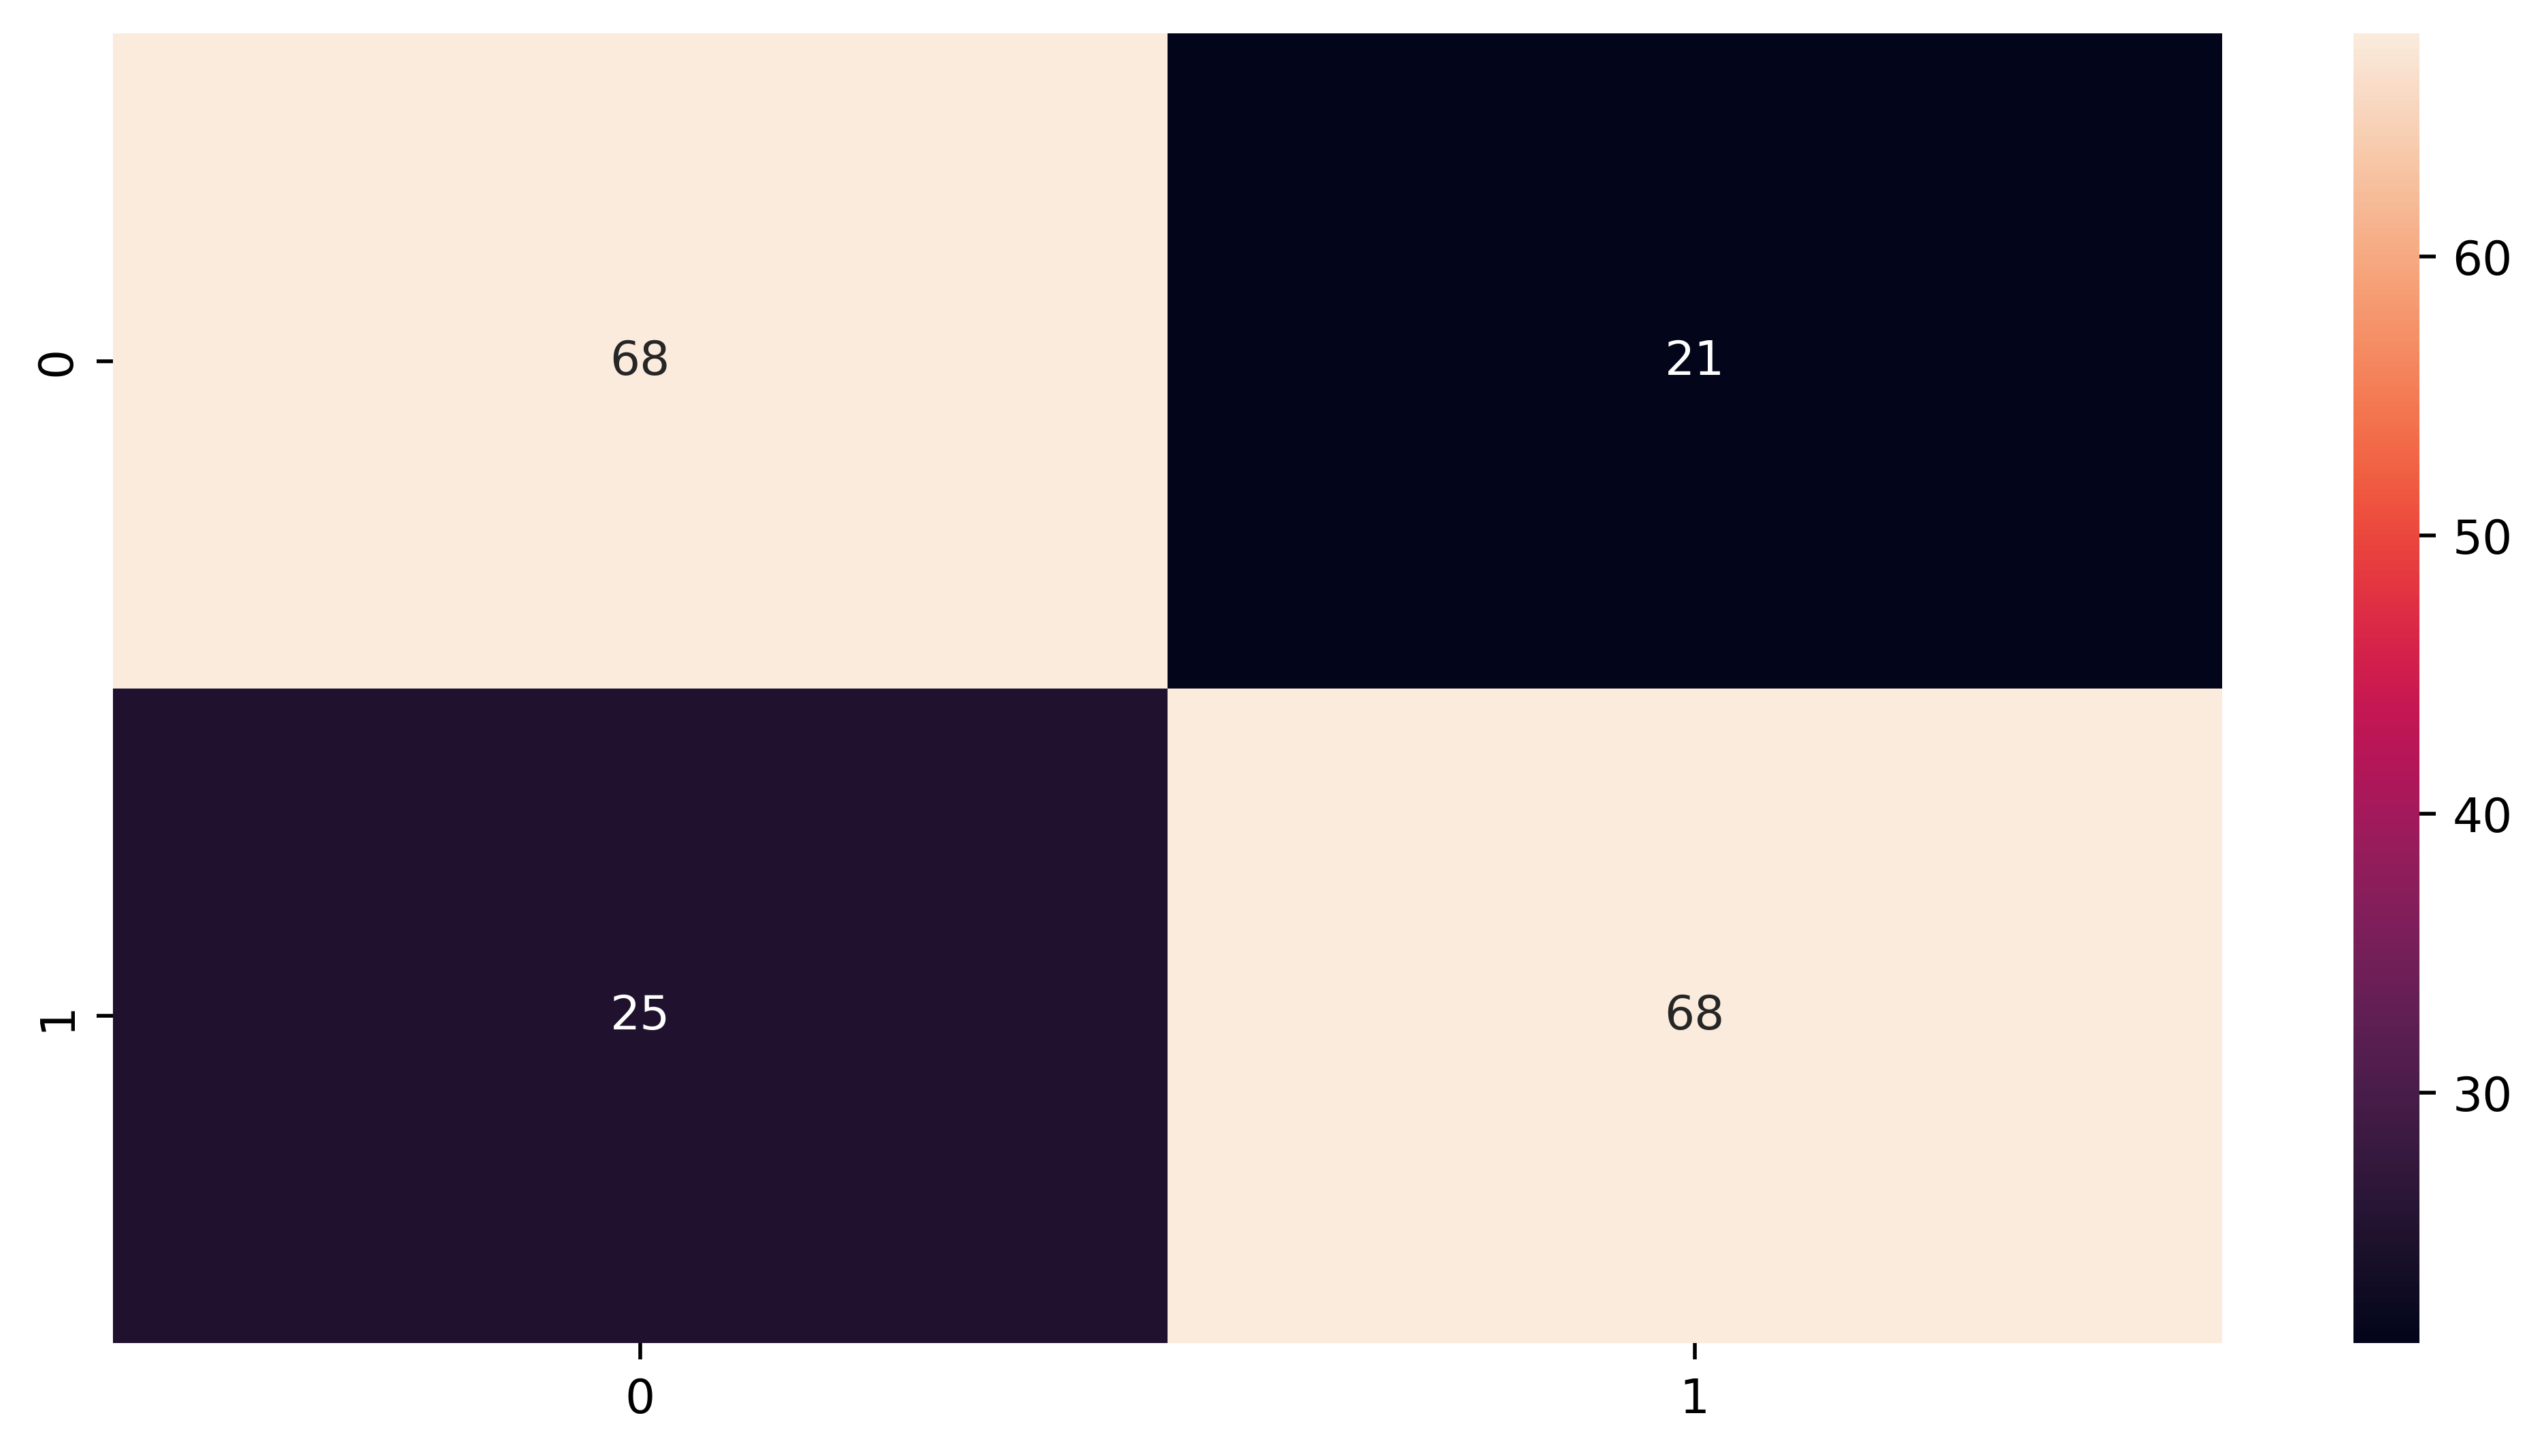

In [41]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True)

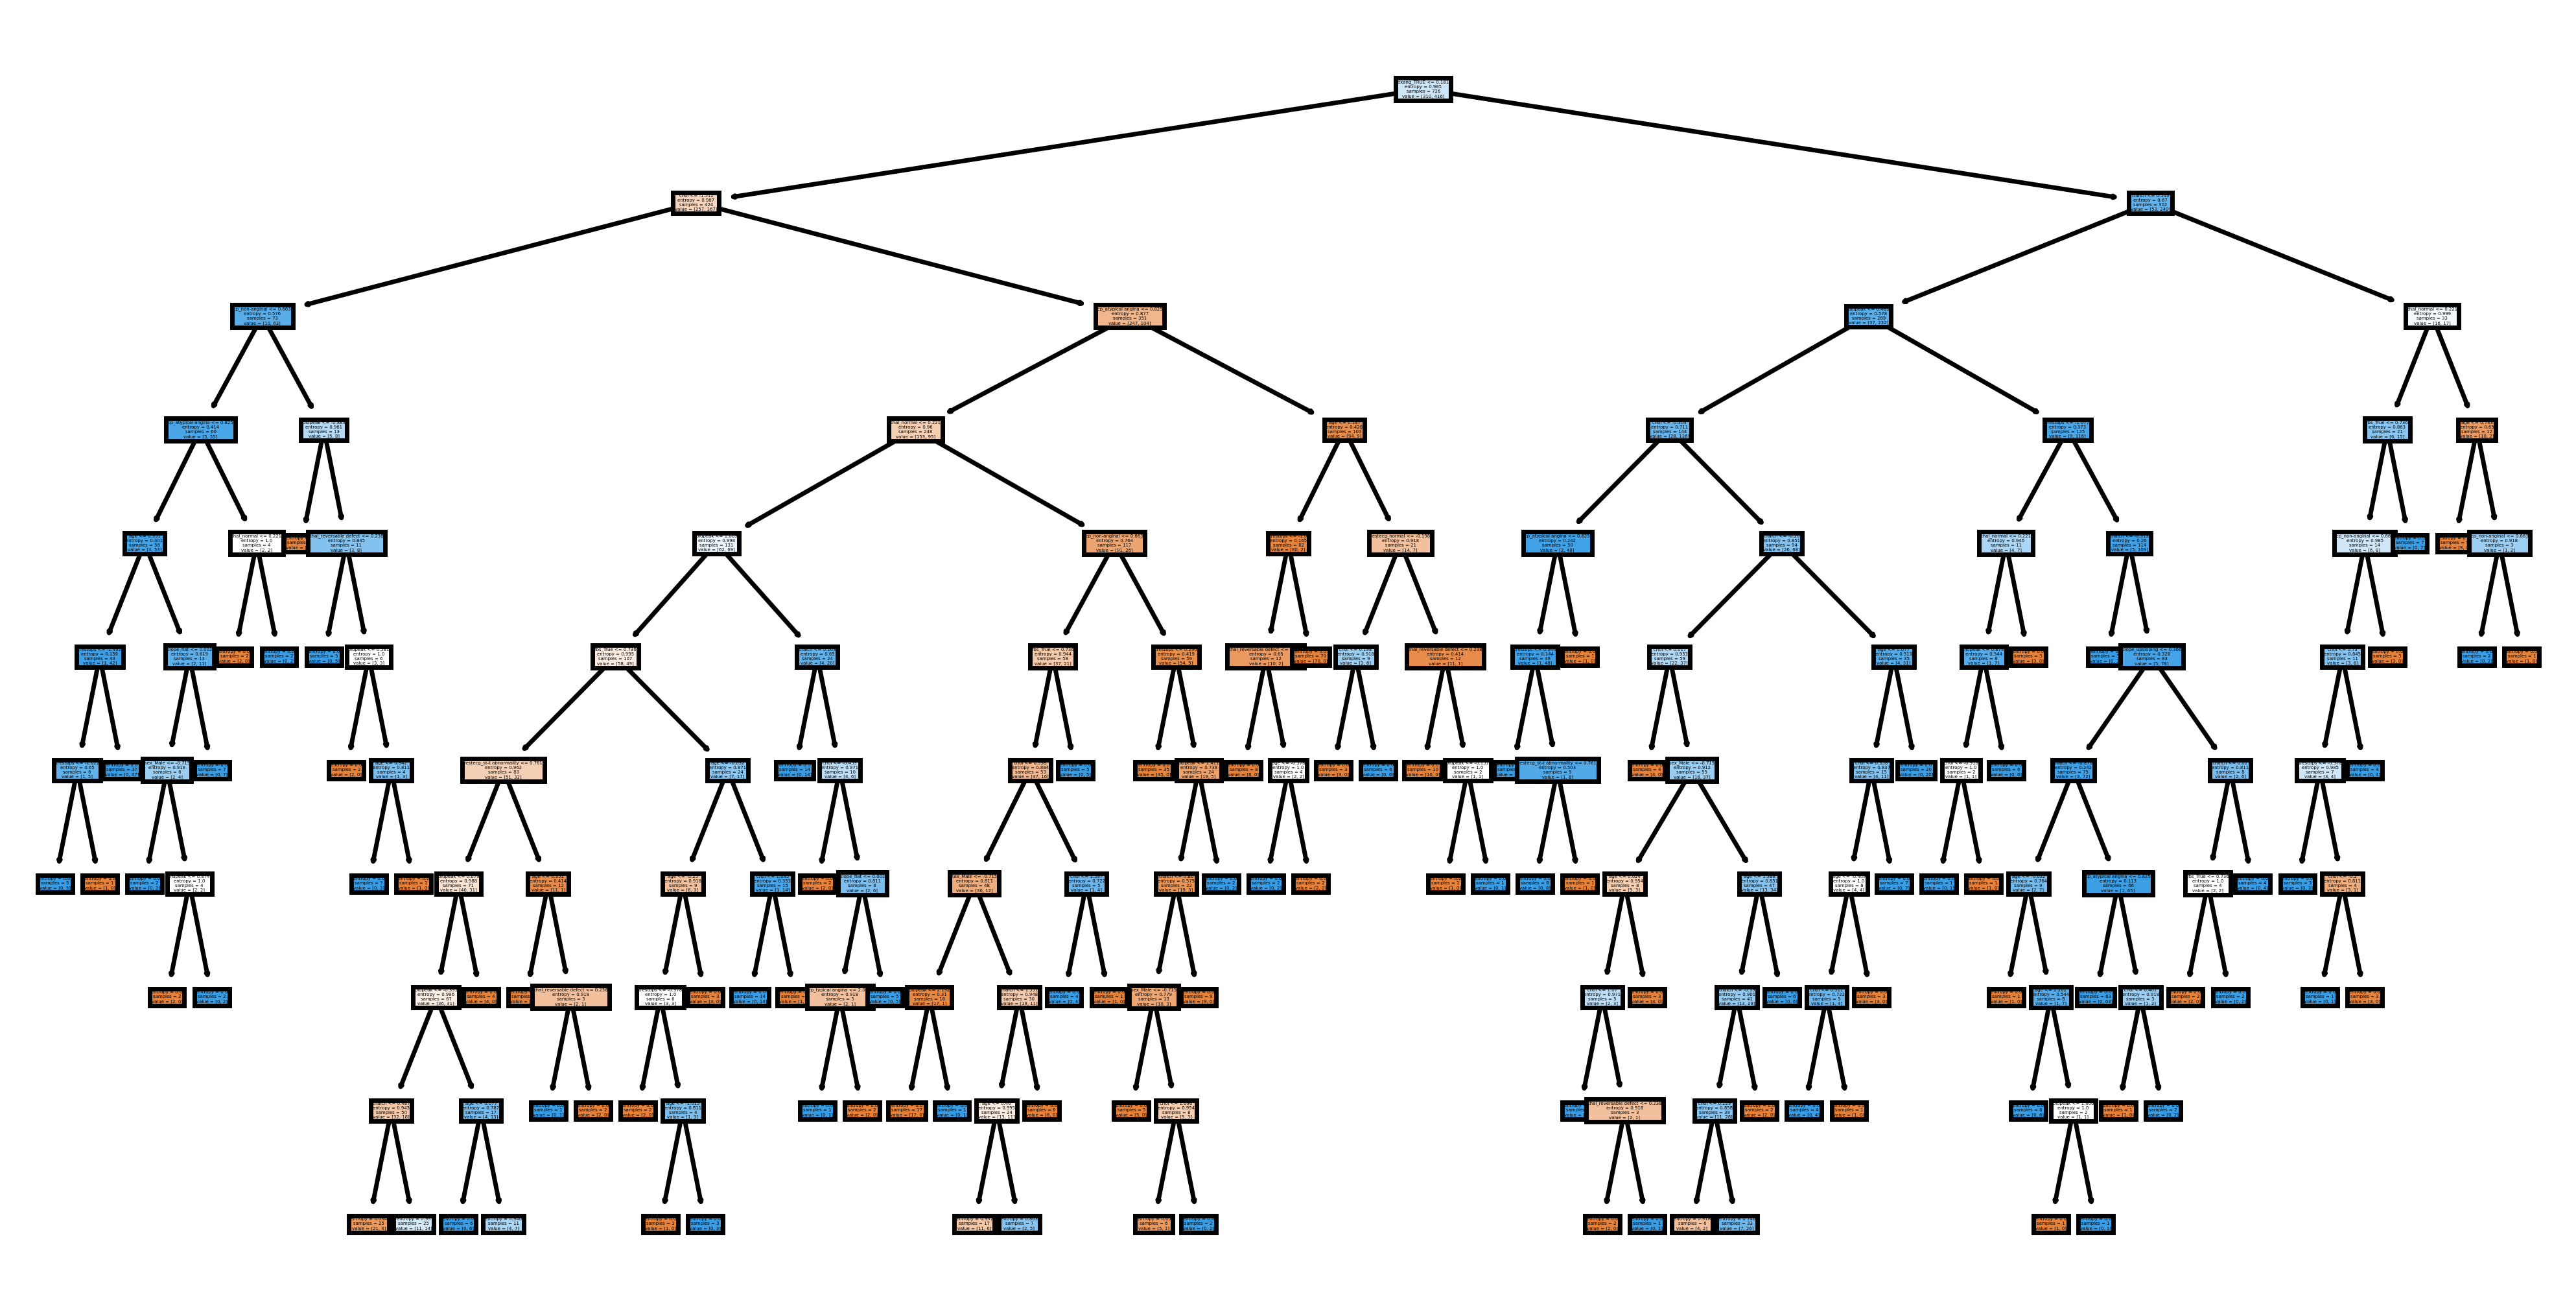

In [42]:
tree.plot_tree(dt, feature_names= list(x.columns),
              filled=True)
plt.show()

### Hyperparameter Tuning

In [43]:
DecisionTreeClassifier(random_state=42)

DecisionTreeClassifier(random_state=42)

In [44]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 5, 10, 15],
    'splitter': ['best', 'random']
}

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=params,
                  cv=5, scoring='accuracy')

In [47]:
grid.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [48]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}

In [49]:
dtc = DecisionTreeClassifier(criterion='gini',
                           max_depth=5,splitter='random')

In [50]:
dtc.fit(xtrain,ytrain)
ypred1  = dtc.predict(xtest)

In [51]:
dtc.score(xtrain,ytrain),dtc.score(xtest,ytest)

(0.8099173553719008, 0.7582417582417582)

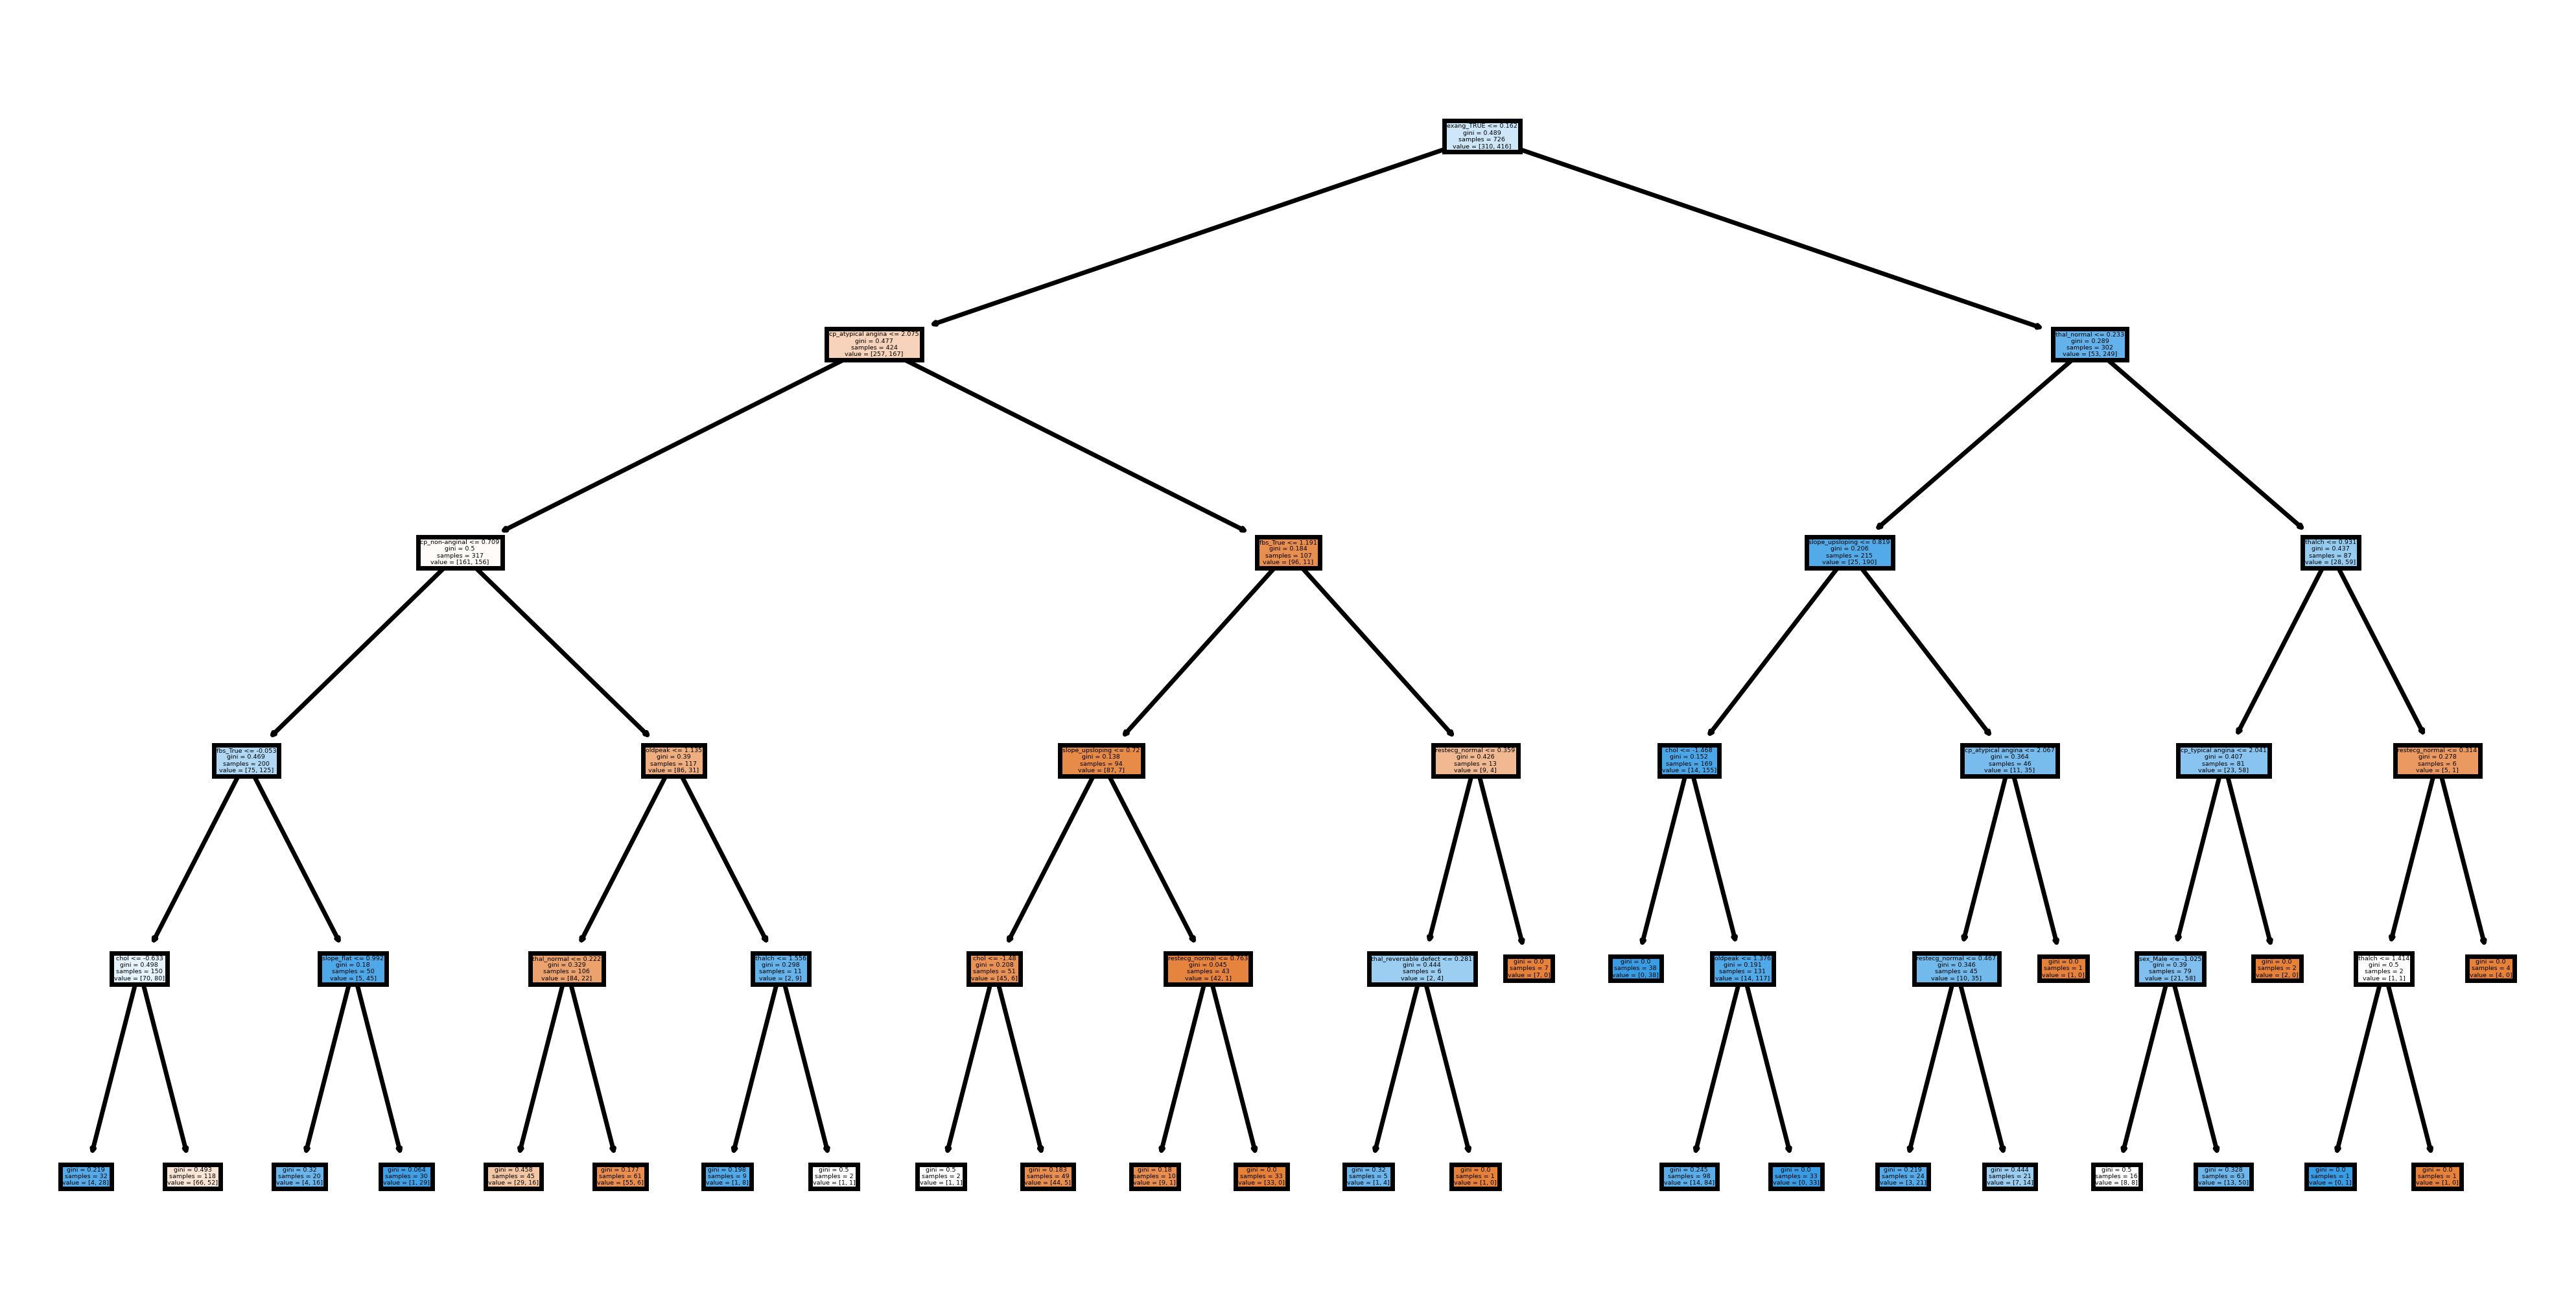

In [52]:
tree.plot_tree(dtc, feature_names=list(x.columns),filled=True)
plt.show()

In [1]:
# Interview Questions:
    # 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
    # 2. What is the difference between the Label encoding and One-hot encoding?